### This notebook plots results of texture attacks

In [92]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from matplotlib.patches import Polygon
import pandas as pd


colors = [
"#f0f0f0"
, "#d9d9d9"
, "#bdbdbd"
, "#969696"
, "#737373"
, "#525252"
, "#252525"
, "#000000" ]

In [3]:
def make_loss_plot(result_range=None, results_dir=None, title=None):
    hs = result_range
    data = []
    for h in hs:
        d = []
        with open(f"{results_dir}/{h}.csv", 'r') as csvfile:
            plots = csv.reader(csvfile, delimiter=',')
            vals = []
            for row in plots:
                vals.append(row)

            for v in vals[0]:
                d.append(float(v)) 
            data.append(d)

    padded_data = []
    for d in range(0, len(data)):
        y = data[d]
        y = y + [np.nan] * (len(data[0]) - len(y))
        padded_data.append(y)

    x = range(len(padded_data[0]))
    fig = plt.figure(figsize=(15, 4)) # specify width and height
    for p in range(0,len(padded_data)):
        y = padded_data[p]
        if p == len(padded_data)-1:
            color="blue"
        else: color = colors[p]
        plt.plot(x, y, label=f"Pass {p}", color = color)
    plt.ylim(ymin=0, ymax=0.50)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()


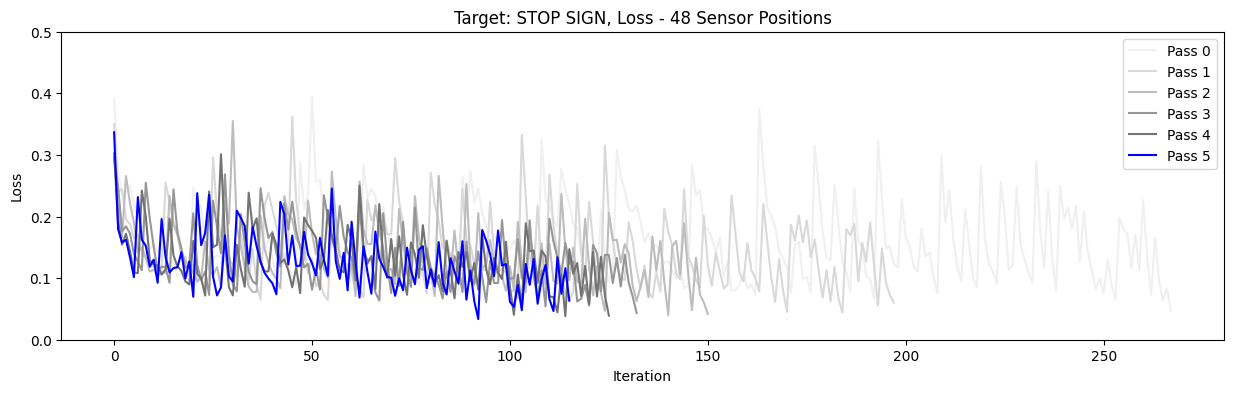

In [4]:
result_range = range(2,8)
results_dir = "../results/stop_sign/"
title = "Target: STOP SIGN, Loss - 48 Sensor Positions"
make_loss_plot(result_range,  results_dir, title)

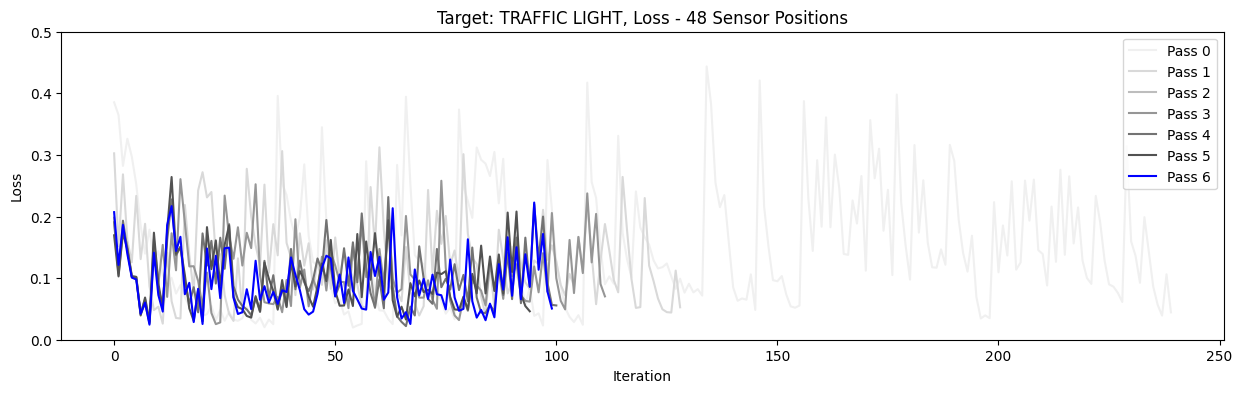

In [5]:
result_range = range(0,7)
results_dir = "../results/traffic_light/"
title = "Target: TRAFFIC LIGHT, Loss - 48 Sensor Positions"
make_loss_plot(result_range,  results_dir, title)

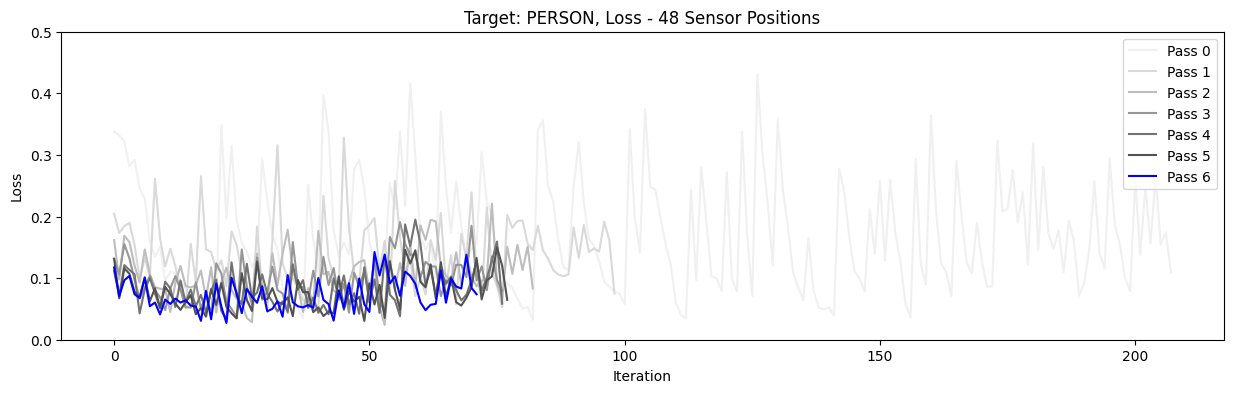

In [6]:
result_range = range(0,7)
results_dir = "../results/person/"
title = "Target: PERSON, Loss - 48 Sensor Positions"
make_loss_plot(result_range,  results_dir, title)

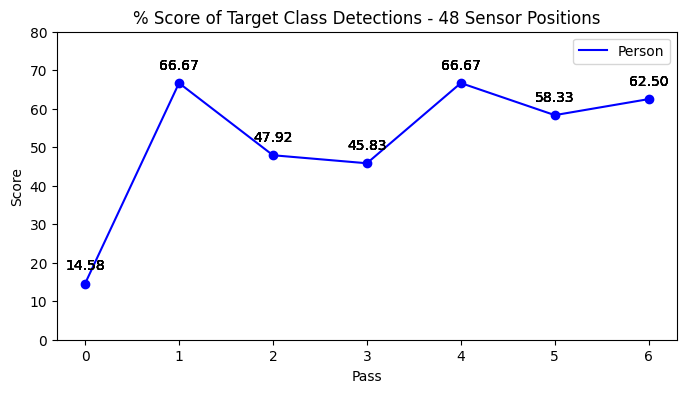

In [154]:
def plot_scores(results_range, results_dir, title, label):
    
    true_count = 0
    false_count = 0
    total_count = 0

    data = []
    for i in result_range:    
        with open(f"{results_dir}{i}_scores.csv", "r") as csvfile:
            total_count = 0
            true_count = 0
            reader = csv.reader(csvfile)
            for row in reader:
                total_count += 1
                if row[1] == "True":
                    true_count += 1
                else:
                    false_count += 1

        d = true_count / total_count * 100
        data.append(d)

    x = range(0,len(data))
    fig = plt.figure(figsize=(8, 4)) # specify width and height
    color = "blue"
    plt.plot(x, data, label=label, color = color)
    plt.scatter(x, data, color = color)
    for i, d in enumerate(data):
        for i, d in enumerate(data):
            plt.annotate("{:.2f}".format(d), (x[i], d), xytext=(0, 10), textcoords="offset points", ha="center")
    plt.ylim(ymin=0, ymax=80.0)
    plt.xlabel("Pass")
    plt.ylabel("Score")
    plt.legend()
    plt.title(title)
    plt.show()
    return data

results_range = range(0,6)
results_dir = "../results/person/"
title = "% Score of Target Class Detections - 48 Sensor Positions"
label = "Person"

person_data = plot_scores(results_range, results_dir, title, label)


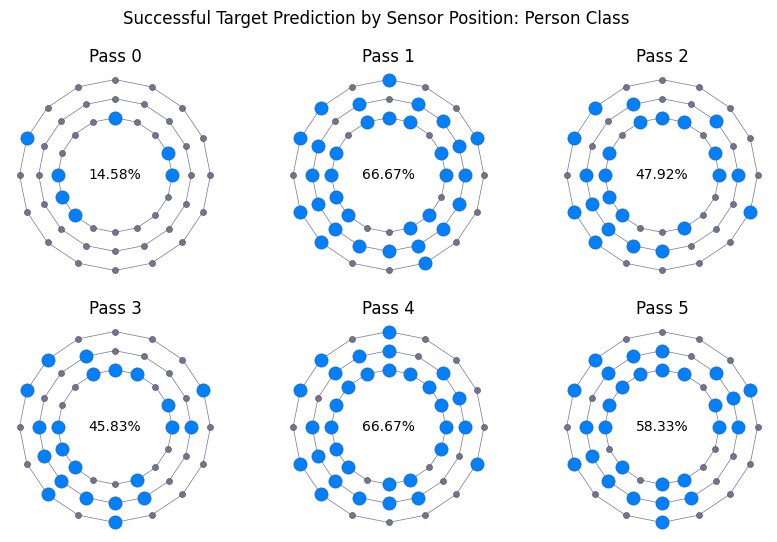

In [163]:
def plot_ngon(num_polygons=3, num_sides=16, radius = 1, max_radius = 1, results_path=None, annotations=None):
    radii = [1.0, 0.8, 0.6]
    # fig, ax = plt.subplots()
    for r in range(num_polygons):
        center = (0, 0)
        # Generate the vertices of the polygon
        angle = 2 * np.pi / num_sides
        vertices = [(center[0] + radii[r] * np.cos(i * angle), center[1] + radii[r] * np.sin(i * angle)) for i in range(num_sides)]

        # Create the polygon patch
        polygon = Polygon(vertices, facecolor='none', edgecolor='#73738D', alpha=1, linewidth=0.5)

        # Add the polygon to the plot
        ax.add_patch(polygon)

        # each set of 16 values in the scores.csv represents a 16 sided n-gon of sensor positions
        values = pd.read_csv(results_path, header=None)[1].tolist()
        if r == 0: 
            values = values[0:16]
        if r == 1:
            values = values[16:32]
        if r == 2:
            values = values[32:48]
        for i, (x, y) in enumerate(vertices):
            if values[i]:
                ax.scatter(x, y, edgecolor='#2166ac', linewidth=0.5, color="#0080FF", s=90)
            else:
                ax.scatter(x, y, edgecolor='black', linewidth=0.2, color='#73738D', s=20)

    ax.text(0, 0, "{:.2f}%".format(annotations), ha="center", va="center", color="black",
        bbox=dict(boxstyle="square, pad=0.9", alpha=0.5, color="white"))

    # Set the x-axis and y-axis limits to include the entire polygon

    ax.set_xlim(-max_radius - 0.1, max_radius + 0.1)
    ax.set_ylim(-max_radius - 0.1, max_radius + 0.1)
    ax.axis("off")
    ax.set_aspect('equal', adjustable='box')

rows, columns = 2, 3
fig, axs = plt.subplots(rows, columns, figsize=(10, 6))
for i in range(rows*columns):
    row = i // columns
    col = i % columns
    ax = axs[row][col]
    ax.set_title("Pass {}".format(i))
    plt.suptitle("Successful Target Prediction by Sensor Position: Person Class")
    plot_ngon(num_sides=16, radius=1, results_path = f"../results/person/{i}_scores.csv", annotations=person_data[i])
